In [3]:
%run functions.ipynb
#%run data_preparation.ipynb

# Open all files / computing intensive
base_folder_path = '/workspaces/nyc_bike_rental//data'
start_year = 2015
end_year = 2019
cd = combine_csv_files_in_years(base_folder_path,start_year,end_year)

Cat = list(cd.columns)
for i in range(15):
  cd[Cat[i]] = cd[Cat[i]].fillna(cd[Cat[i+15]])
Bad_Cat = Cat[15:30]
cd = cd.drop(columns=Bad_Cat)

In [1]:
import matplotlib.pyplot as plt

In [4]:
cd.tail()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
1321173,367.0,2019-02-21 12:05:05.2680,2019-02-21 12:11:13.2210,3694.0,Jackson Square,40.71113,-74.0789,3280.0,Astor Place,40.719282,-74.071262,26189.0,Subscriber,1983.0,1.0
1321174,497.0,2019-02-21 17:45:00.4510,2019-02-21 17:53:18.1580,3694.0,Jackson Square,40.71113,-74.0789,3679.0,Bergen Ave,40.722104,-74.071455,29296.0,Subscriber,1985.0,1.0
1321175,959.0,2019-02-25 06:17:31.9310,2019-02-25 06:33:31.4950,3694.0,Jackson Square,40.71113,-74.0789,3183.0,Exchange Place,40.716247,-74.033459,29673.0,Subscriber,1977.0,1.0
1321176,936.0,2019-02-26 06:14:45.4170,2019-02-26 06:30:21.8750,3694.0,Jackson Square,40.71113,-74.0789,3183.0,Exchange Place,40.716247,-74.033459,29672.0,Subscriber,1977.0,1.0
1321177,822.0,2019-02-26 15:45:20.5370,2019-02-26 15:59:02.6070,3694.0,Jackson Square,40.71113,-74.0789,3280.0,Astor Place,40.719282,-74.071262,26189.0,Subscriber,1983.0,2.0


In [5]:
#print(Cat[3:7])
s_stat = cd[Cat[3:7]].rename(columns={Cat[3]: "ID",Cat[4]: "Name", Cat[5]: "Latitude", Cat[6]: "Longitude"})
e_stat = cd[Cat[7:11]].rename(columns={Cat[7]: "ID",Cat[8]: "Name", Cat[9]: "Latitude", Cat[10]: "Longitude"})

stations = (
    pd.concat([s_stat,e_stat])
    .drop_duplicates()
    .set_index('ID')
    .sort_index()
)

stations

,Name,Latitude,Longitude
ID,,,
79.0,Franklin St & W Broadway,40.719116,-74.006667
116.0,W 17 St & 8 Ave,40.741776,-74.001497
127.0,Barrow St & Hudson St,40.731724,-74.006744
128.0,MacDougal St & Prince St,40.727103,-74.002971
146.0,Hudson St & Reade St,40.716250,-74.009106
...,...,...,...
3694.0,Jackson Square,40.711130,-74.078900
3709.0,W 15 St & 6 Ave,40.738046,-73.996430
3750.0,Forrest Tech Shop (parts testing),40.703006,-73.932077


<BarContainer object of 7 artists>

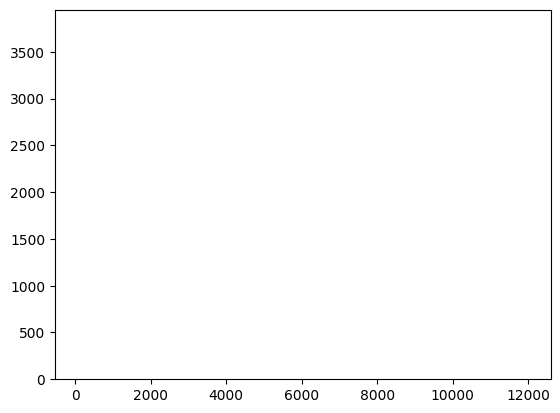

In [23]:
cd1= cd[cd['Trip Duration'] < 1000000]
cd1=cd1.iloc[1:10000]
cd2=cd1['Trip Duration']
#cd2[(cd2<600) & (cd2 > 300)].count()


time_int = [0,60,300,600,1200,1800,6000,12000]
counts = []
for x in range(len(time_int)-1):
    count = cd2[(cd2 > time_int[x]) & (cd2 < time_int[x+1])].count()
    counts.append(count)

plt.bar(x=time_int[1:len(counts)+1], height=counts)